In [2]:
from semra.analysis.landscape import notebook, get_mesh_category_curies
from cells import CONFIGURATION
import pyobo

In [4]:
# some resources are generic, so we want to cut to a relevant subset
subsets = {
    "mesh": ["mesh:D002477"],
    "efo": ["efo:0000324"],
    "ncit": ["ncit:C12508"],
}

## Summarize the Resources

We summarize the resources used in the landscape analysis, including their [Bioregistry](https://bioregistry.io)
prefix, license, current version, and number of terms (i.e., named concepts) they contain.


,name,license,version,terms
prefix,,,,
mesh,Medical Subject Headings,CC0-1.0,2024,635
efo,Experimental Factor Ontology,Apache-2.0,3.64.0,89
cellosaurus,Cellosaurus,CC-BY-4.0,48.0,148681
ccle,Cancer Cell Line Encyclopedia Cells,ODbL-1.0,None,1061
depmap,DepMap Cell Lines,None,23Q4,1719
bto,BRENDA Tissue Ontology,CC-BY-4.0,2021-10-26,6511
cl,Cell Ontology,CC-BY-4.0,2024-02-13,2739
clo,Cell Line Ontology,CC-BY-3.0,2.1.178,39080


## Summarize the Mappings

In order to summarize the mappings, we're going to load them, index them, and count
the number of mappings between each pair of resources. The self-mapping column is
the count of terms in the resource. We'll do this to the raw mappings first, then
to the processed mappings, then compare them.


First, we summarize the raw mappings, i.e., the mappings that are directly available from the sources

target_prefix,mesh,efo,cellosaurus,ccle,depmap,bto,cl,clo
source_prefix,,,,,,,,
mesh,635,21,31,0,0,0,84,35
efo,21,89,1299,564,0,288,14,410
cellosaurus,31,1299,148681,113,1894,2415,0,34149
ccle,0,564,113,1061,1535,2,0,0
depmap,0,0,1894,1535,1719,0,0,0
bto,0,288,2415,2,0,6511,328,5
cl,84,14,0,0,0,328,2739,0
clo,35,410,34149,0,0,5,0,39080


Next, we summarize the processed mappings, which include inference, reasoning, and confidence filtering.

target_prefix,mesh,efo,cellosaurus,ccle,depmap,bto,cl,clo
source_prefix,,,,,,,,
mesh,635,24,38,10,10,70,86,47
efo,24,89,1406,648,769,698,19,1185
cellosaurus,38,1406,148681,1656,1913,2423,1,34150
ccle,10,648,1656,1061,1536,644,0,1417
depmap,10,769,1913,1536,1719,672,0,1473
bto,70,698,2423,644,672,6511,329,1440
cl,86,19,1,0,0,329,2739,1
clo,47,1185,34150,1417,1473,1440,1,39080


Below is an graph-based view on the processed mappings.

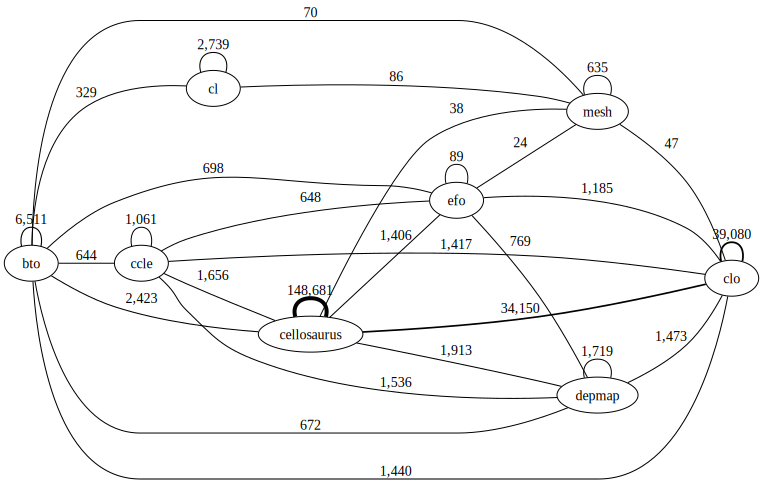

## Comparison

The following comparison shows the absolute number of mappings added by processing/inference.
Across the board, this process adds large numbers of mappings to most resources, especially
ones that were previously only connected to a small number of other resources.


target_prefix,mesh,efo,cellosaurus,ccle,depmap,bto,cl,clo
source_prefix,,,,,,,,
mesh,0,3,7,10,10,70,2,12
efo,3,0,107,84,769,410,5,775
cellosaurus,7,107,0,1543,19,8,1,1
ccle,10,84,1543,0,1,642,0,1417
depmap,10,769,19,1,0,672,0,1473
bto,70,410,8,642,672,0,1,1435
cl,2,5,1,0,0,1,0,1
clo,12,775,1,1417,1473,1435,1,0


Here's an alternative view on the number of mappings normalized to show percentage gain.

Note:

- `inf` means that there were no mappings before and now there are a non-zero number of mappings
- `NaN` means there were no mappings before inference and continue to be no mappings after inference


target_prefix,mesh,efo,cellosaurus,ccle,depmap,bto,cl,clo
source_prefix,,,,,,,,
mesh,0.0,14.3,22.6,inf,inf,inf,2.4,34.3
efo,14.3,0.0,8.2,14.9,inf,142.4,35.7,189.0
cellosaurus,22.6,8.2,0.0,1365.5,1.0,0.3,inf,0.0
ccle,inf,14.9,1365.5,0.0,0.1,32100.0,NaN,inf
depmap,inf,inf,1.0,0.1,0.0,inf,NaN,inf
bto,inf,142.4,0.3,32100.0,inf,0.0,0.3,28700.0
cl,2.4,35.7,inf,NaN,NaN,0.3,0.0,inf
clo,34.3,189.0,0.0,inf,inf,28700.0,inf,0.0


## Landscape Analysis

Before, we looked at the overlaps between each resource. Now, we use that information jointly to
estimate the number of terms in the landscape itself, and estimate how much of the landscape
each resource covers.


This estimates a total of 163,079 unique entities.

- 37,928 (23.3%) have
  at least one mapping.
- 125,151 (76.7%)
  are unique to a single resource.
- 0 (0.0%)
  appear in all 8 resources.

This estimate is susceptible to several caveats:

- Missing mappings inflates this measurement
- Generic resources like MeSH contain irrelevant entities that can't be mapped


Because there are 8, there are 256 possible overlaps to consider.
Therefore, a Venn diagram is not possible, so we
we use an [UpSet plot](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4720993) (Lex *et al.*, 2014)
as a high-dimensional Venn diagram.


/Users/cthoyt/dev/semra/src/semra/analysis/landscape.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


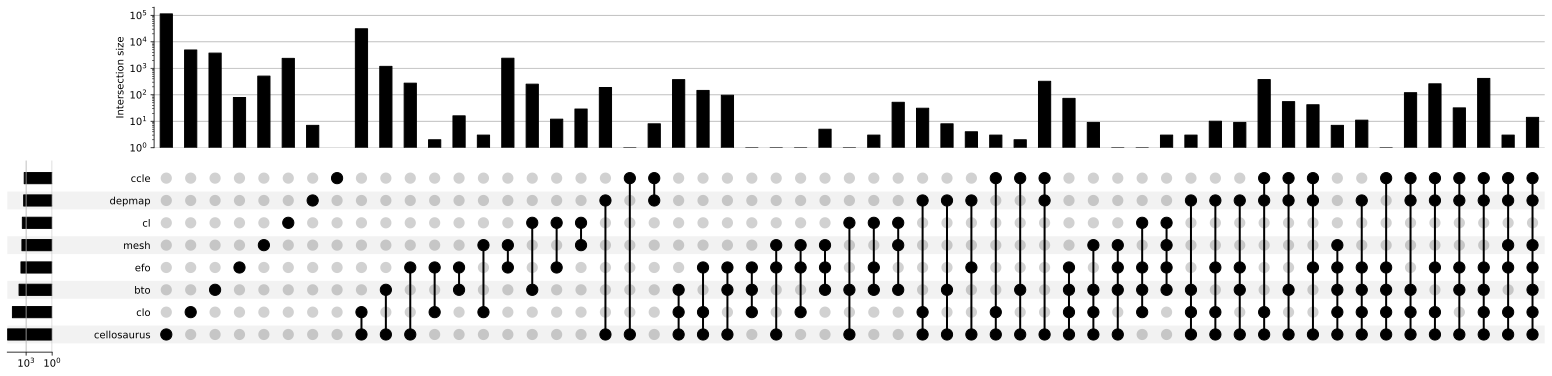

We now aggregate the mappings together to estimate the number of unique entities and number
that appear in each group of resources.


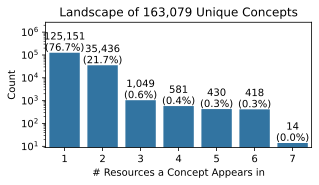

In [5]:
notebook(CONFIGURATION, subsets, output_directory='.')